In [175]:
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [176]:
data = pd.read_csv('results/optimization_results_world_grid.csv')
data = data.set_index('Country')
data = data.drop(['Antarctica'], axis =0)
for col in data.columns[1:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']
    
for c in data.index.to_list(): 
    results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
    data.loc[c, 'capacity_factor_wind'] = results['E_wind']/data.loc[c, 'P_wind']/8760
    data.loc[c, 'capacity_factor_pv'] = results['E_pv']/data.loc[c, 'P_pv']/8760
    data.loc[c, 'capacity_factor_dispatch'] = results['E_dispatch']/data.loc[c, 'P_dispatch']/8760
    data.loc[c, 'share_dispatchable'] = results['E_dispatch']/results['mean_consumption']/8760*100

In [178]:
# Population data
# pop_data = pd.read_excel('../population_data_UN.xlsx', index_col=0, header = 1)
# pop_data = pop_data['Total Population, as of 1 January (thousands)']
# for col in data.columns[1:]: 
#     for country in data.index:
#         # print(country)
#         data[f'{col}_normalized']=data[col]/pop_data.loc[country]
#         # data[f'{col}_normalized']=data[col]/pop_data.loc[country]

## Normalized plots

Documentation on choropleth : https://plotly.com/python/choropleth-maps/

In [198]:
# Create basic choropleth map
fig = px.choropleth(data, locations='iso_alpha', color='share_dispatchable', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable energy (% of demand)', color_continuous_scale='portland')
fig.show()
# fig.write_html('figures/world_maps/dispatchable_energy_hours.html')

In [199]:
fig = px.choropleth(data, locations='iso_alpha', color='E_destock_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (hours of average load)', color_continuous_scale='portland')
fig.show()
# fig.write_html('figures/world_maps/dispatchable_energy_hours.html')

In [200]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (normalized by average load)', color_continuous_scale='portland')
fig.show()

In [201]:
fig = px.choropleth(data, locations='iso_alpha', color='capacity_factor_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity factor', color_continuous_scale='portland')
fig.show()

In [202]:
fig = px.choropleth(data, locations='iso_alpha', color='capacity_factor_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity factor', color_continuous_scale='portland')
fig.show()

In [203]:
fig = px.choropleth(data, locations='iso_alpha', color='capacity_factor_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity factor', color_continuous_scale='portland')
fig.show()

In [204]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='PV weight', color_continuous_scale='portland')
fig.show()

In [205]:
fig = px.choropleth(data, locations='iso_alpha', color='P_wind_normalized', hover_name='iso_alpha',
                    projection='natural earth', title='Wind weight', color_continuous_scale='portland')
fig.show()

# Absolute plots

In [206]:
fig = px.choropleth(data, locations='iso_alpha', color='E_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable electricity needs (MWh)', color_continuous_scale='portland')
fig.show()

In [207]:
fig = px.choropleth(data, locations='iso_alpha', color='E_destock', hover_name='iso_alpha',
                    projection='natural earth', title='Storage utilization (MWh)', color_continuous_scale='portland')
fig.show()

In [208]:
fig = px.choropleth(data, locations='iso_alpha', color='P_dispatch', hover_name='iso_alpha',
                    projection='natural earth', title='Dispatchable capacity (MW)', color_continuous_scale='portland')
fig.show()

In [209]:
fig = px.choropleth(data, locations='iso_alpha', color='P_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV capacity (MW)', color_continuous_scale='portland')
fig.show()

In [210]:
fig = px.choropleth(data, locations='iso_alpha', color='P_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind capacity (MW)', color_continuous_scale='portland')
fig.show()

# Köppen Climate Classification

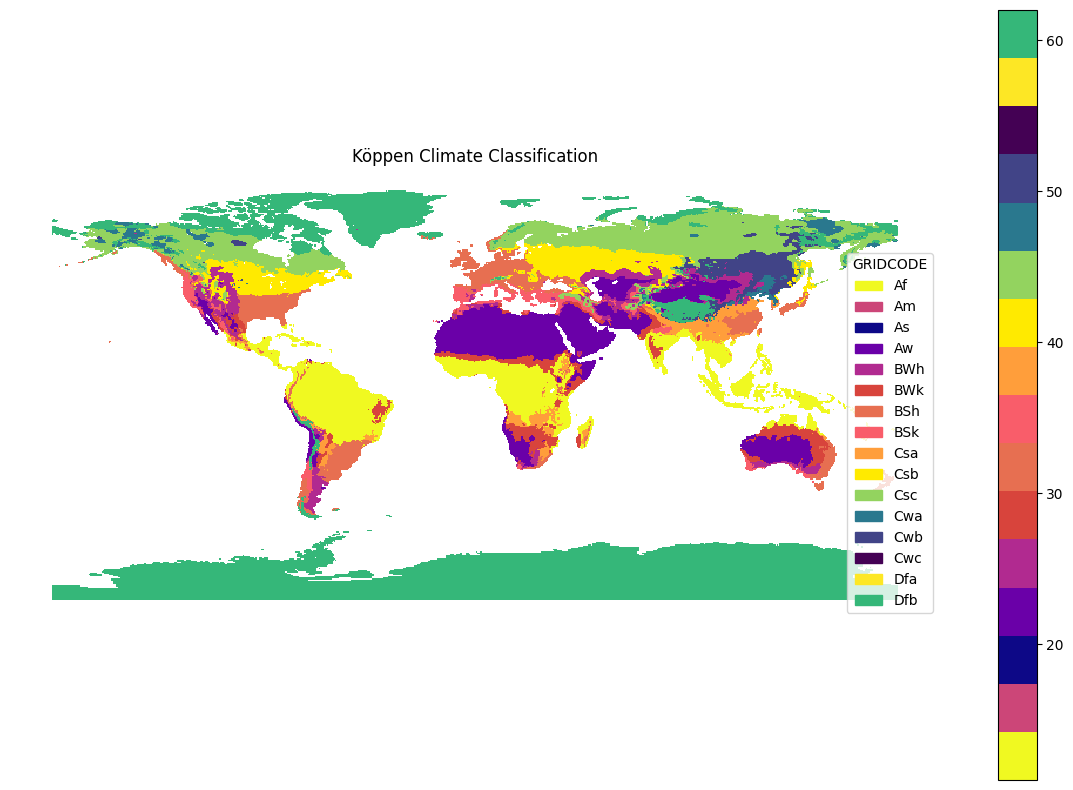

In [192]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
# Load the Köppen climate classification shapefile
shapefile_path = 'koppen_climates/c1976_2000_1.shp'
koppen_data = gpd.read_file(shapefile_path)

colors = [
    "#f0f921", "#cc4678", "#0d0887", "#6a00a8", "#b12a90", "#d8443c", "#e76f51", "#f95d6a",
    "#ff9e3b", "#ffea00", "#93d35f", "#2a788e", "#414487", "#440154", "#fde725", "#35b779"
]
cmap = ListedColormap(colors)
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
koppen_data.plot(column='GRIDCODE',cmap = cmap, ax=ax, legend=True)

legend_labels = {
    1: "Af",
    2: "Am",
    3: "As",
    4: "Aw",
    5: "BWh",
    6: "BWk",
    7: "BSh",
    8: "BSk",
    9: "Csa",
    10: "Csb",
    11: "Csc",
    12: "Cwa",
    13: "Cwb",
    14: "Cwc",
    15: "Dfa",
    16: "Dfb",
}
legend_handles = [Patch(color=colors[i-1], label=legend_labels[i]) for i in range(1, 17)]
ax.legend(handles=legend_handles, title='GRIDCODE', loc='lower right')
# ax.legend()
ax.set_title('Köppen Climate Classification')
ax.set_axis_off()
plt.show()

In [193]:
koppen_data

,ID,GRIDCODE,geometry
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500..."
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500..."
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500..."
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500..."
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000..."
...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0..."
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5..."
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0..."
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80..."


In [194]:
from ren_ninja_api import grid_coordinates

s:\131-DPE\131.1-Temporaire\131.1.1-Espace commun\zone transfert temporaire\ITESE Grenoble\Stage Justine\Code git\wavelet_decomposition\optim_mix\ren_ninja_api.py:86: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

s:\131-DPE\131.1-Temporaire\131.1.1-Espace commun\zone transfert temporaire\ITESE Grenoble\Stage Justine\Code git\wavelet_decomposition\optim_mix\ren_ninja_api.py:101: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


s:\131-DPE\131.1-Temporaire\131.1.1-Espace commun\zone transfert temporaire\ITESE Grenoble\Stage Justine\Code git\wavelet_decomposition\optim_mix\ren_ninja_api.py:109: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect.

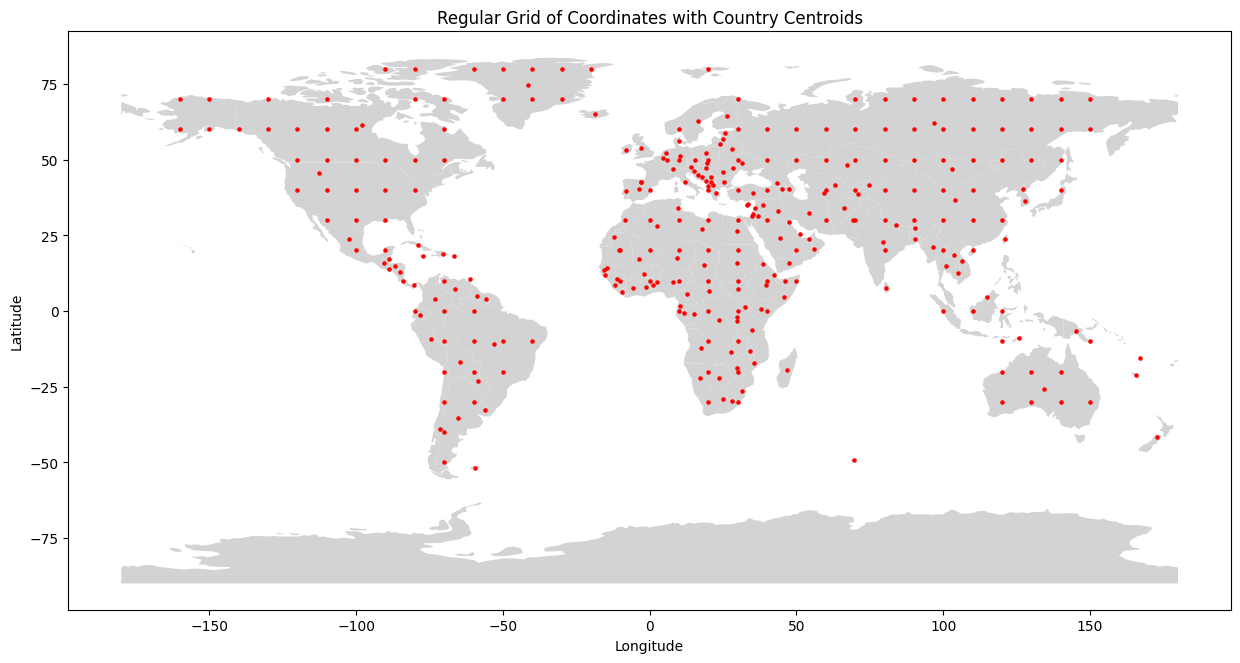

In [195]:
points_in_world =grid_coordinates(10, plot=True)

In [196]:
points_in_world[points_in_world['iso_a3']=='LAO']

,geometry,latitude,index_right,pop_est,continent,name,iso_a3,gdp_md_est
740,POINT (103.75026 18.44498),18.444978,92,7169455.0,Asia,Laos,LAO,18173
742,POINT (106.28584 16.65794),16.657938,92,7169455.0,Asia,Laos,LAO,18173


In [197]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Définir les limites de la grille
min_lon, min_lat, max_lon, max_lat = -180, -90, 180, 90
grid_spacing = 5  # espacement de 10 degrés

# Générer les points de la grille
lons = np.arange(min_lon, max_lon, grid_spacing)
lats = np.arange(min_lat, max_lat, grid_spacing)
grid_points = [Point(lon, lat) for lon in lons for lat in lats]

# Créer un GeoDataFrame pour les points de la grille
grid_df = gpd.GeoDataFrame(geometry=grid_points, crs=world.crs)

# Extraire les centroïdes des pays
centroids = world.centroid

# Créer un GeoDataFrame pour les centroïdes
centroids_df = gpd.GeoDataFrame(geometry=centroids, crs=world.crs)

C:\Users\JD278300\AppData\Local\Temp\ipykernel_6500\2894386996.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



NameError: name 'Point' is not defined

In [ ]:
centroids

0      POINT (163.85316 -17.31631)
1        POINT (34.75299 -6.25773)
2       POINT (-12.13783 24.29117)
3       POINT (-98.14238 61.46908)
4      POINT (-112.59944 45.70563)
                  ...             
172      POINT (20.81965 44.23304)
173      POINT (19.28618 42.78904)
174      POINT (20.89536 42.57937)
175     POINT (-61.33037 10.42824)
176       POINT (30.19862 7.29289)
Length: 177, dtype: geometry